### To Predict whether a Applicant Loan will be approved or not

**About Company**
- Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. 
Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

**Problem**
- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Table of Contents

1.Problem Statement

2.Hypothesis Generation

3.Loading the data

4.Understanding the data

5.Exploratory Data Analysis (EDA)

i)Univariate Analysis

ii)Bivariate Analysis

6.Missing value and outlier treatment

7.Feature Engineering

8.Model Building :

i)Logistic Regression

ii) Decision Tree

iii) Random Forest

iv) Random Forest with Grid Search

v)XGBClassifier

**Hypothesis Generataion**
* Understanding the problem in detail by brainstroming as many as possible factors which can impact the outcome. It is done by understanding the problem statement throughly and before looking at tha data.

* **Salary**: Applicants with high income should have more chances of loan approval.
* **Previous History**: Applicants who have repayed their privious debts should  hasve higher chances of loan approval.
* **Loan amount**: Loan approval should also depend on loan amount. If the loan amount is less, chances of loan approval is       high.
* **Loan term**: Loan for less time period and less amount should have higher chances of approval.
* **EMI**: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval. 

### Features of training dataset:-
    1.Loan_ID= Unique Loan ID
    2.Gender= Male/ Female
    3.Married= Applicant married (Y/N)
    4.Dependents= Number of dependents
    5.Education= Applicant Education (Graduate/ Under Graduate)
    6.Self_Employed= Self-employed (Y/N)
    7.ApplicantIncome= Applicant income
    8.CoapplicantIncome= Coapplicant income
    9.LoanAmount= Loan amount in thousands
    10.Loan_Amount_Term= Term of the loan in months
    11.Credit_History= Credit history meets guidelines
    12.Property_Area= Urban/ Semi-Urban/ Rural
    13.Loan_Status= (Target) Loan approved (Y/N)

#### importing libraries

In [1]:
import pandas as pd
import numpy as np  #for mathmatical calculations
import matplotlib.pyplot as plt #for plotting graph
%matplotlib inline
import seaborn as sns #for visualization

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('loanPred_data\\Training Dataset.csv')
df_test = pd.read_csv('loanPred_data\\Test Dataset.csv')

In [3]:
train_original = df_train.copy()
test_original = df_test.copy()

### Understanding the Data

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print(df_train.shape, df_test.shape)

(614, 13) (367, 12)


### Univariate Analysis

In [9]:

df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df_train['Loan_Status'].value_counts(normalize=True)   #gives proportion instead of nos

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

- About 68.72% Apllicants gets the approval for Loan

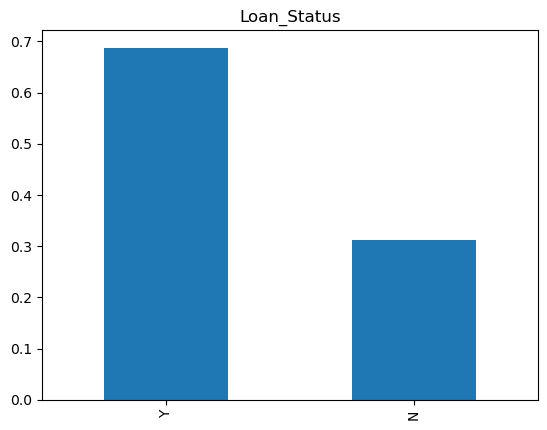

In [11]:
df_train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')
plt.show()

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

In [12]:
df_train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [13]:
df_train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [14]:
df_train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [15]:
df_train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

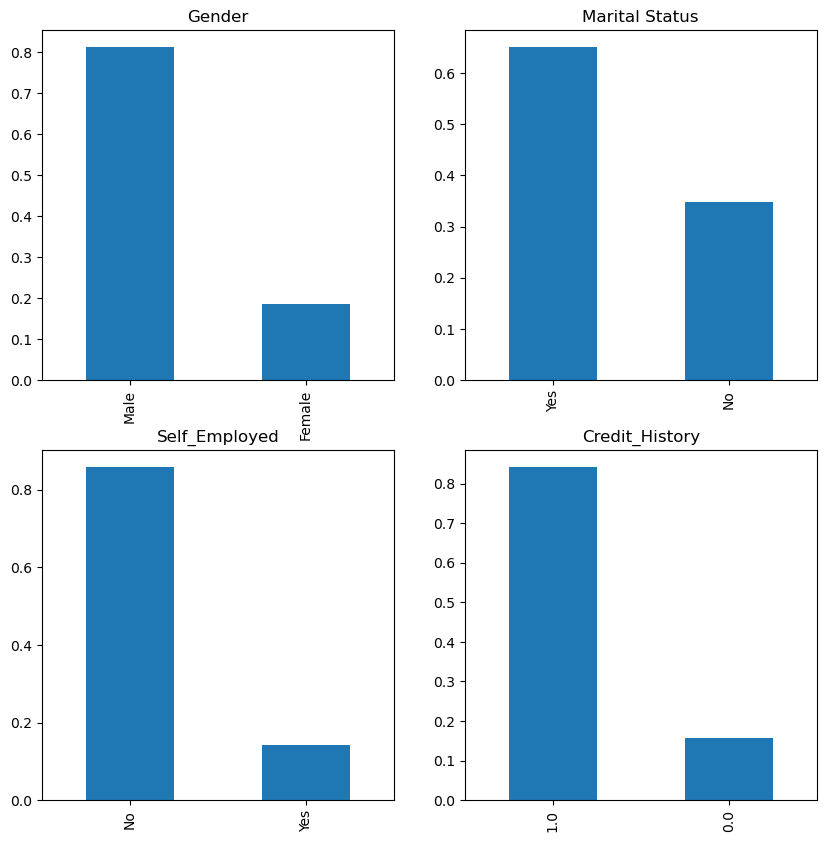

In [16]:
#Creating different bar charts on one image using subplots() function.
plt.figure(figsize=(10,10))

plt.subplot(2,2,1) # plotting 
df_train['Gender'].value_counts(normalize=True).plot.bar()
plt.title("Gender")

plt.subplot(2,2,2)
df_train['Married'].value_counts(normalize=True).plot.bar()
plt.title("Marital Status")

plt.subplot(2,2,3)
df_train['Self_Employed'].value_counts(normalize=True).plot.bar()
plt.title("Self_Employed")

plt.subplot(2,2,4)
df_train['Credit_History'].value_counts(normalize=True).plot.bar()
plt.title("Credit_History")

#Displaying the Chart.
plt.show()

* It can be inferred from above bar plot is that:
    - About 81% of Applicants are Male.
    - About 65% Applicants are married.
    - About 85% Applicants are  not self empoyeed.
    - About 84% Applicants have the credit score of 1

**Analysis on categorical variable(ordinal)**
- ordinal varaible: Dependents, Education, Property_Area

In [17]:
df_train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [18]:
df_train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [19]:
df_train['Property_Area'].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

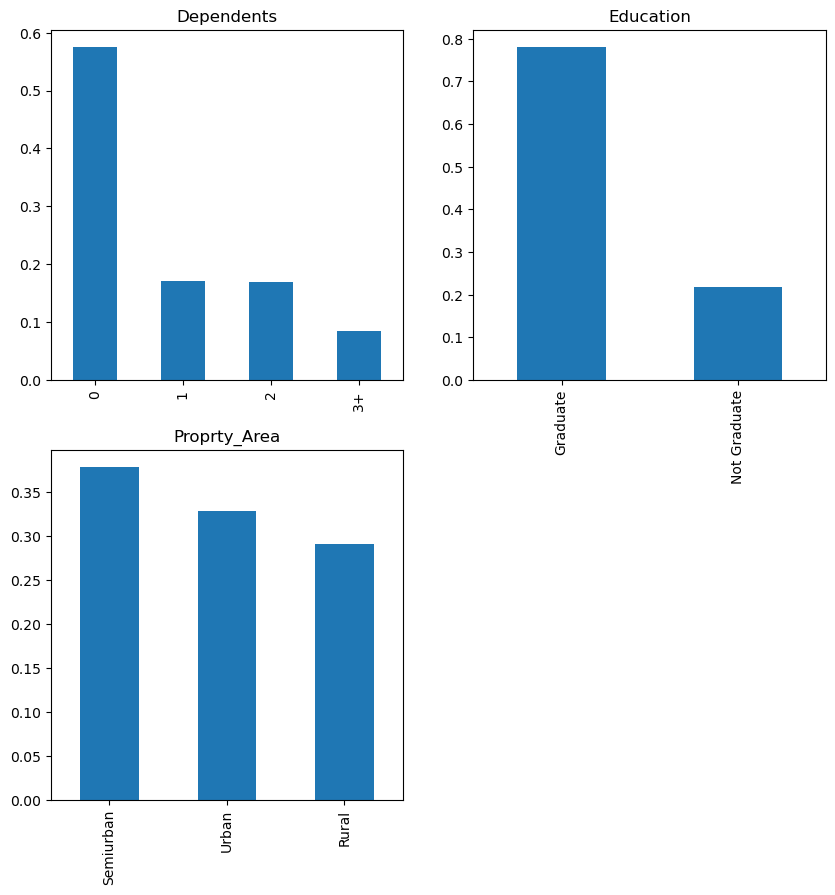

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
df_train['Dependents'].value_counts(normalize=True).plot(kind='bar', title='Dependents')

plt.subplot(2,2,2)
df_train['Education'].value_counts(normalize=True).plot(kind='bar', title='Education')

plt.subplot(2,2,3)
df_train['Property_Area'].value_counts(normalize=True).plot(kind='bar', title='Proprty_Area')

plt.show()

- From above plot it can be inferred that-
- around 57% Applicants is having 0 dependents
-  around 78% Applicants are Graduate
- Around 38% Applicants are from SemiUrban areas

**analysis on Numerical Variables**

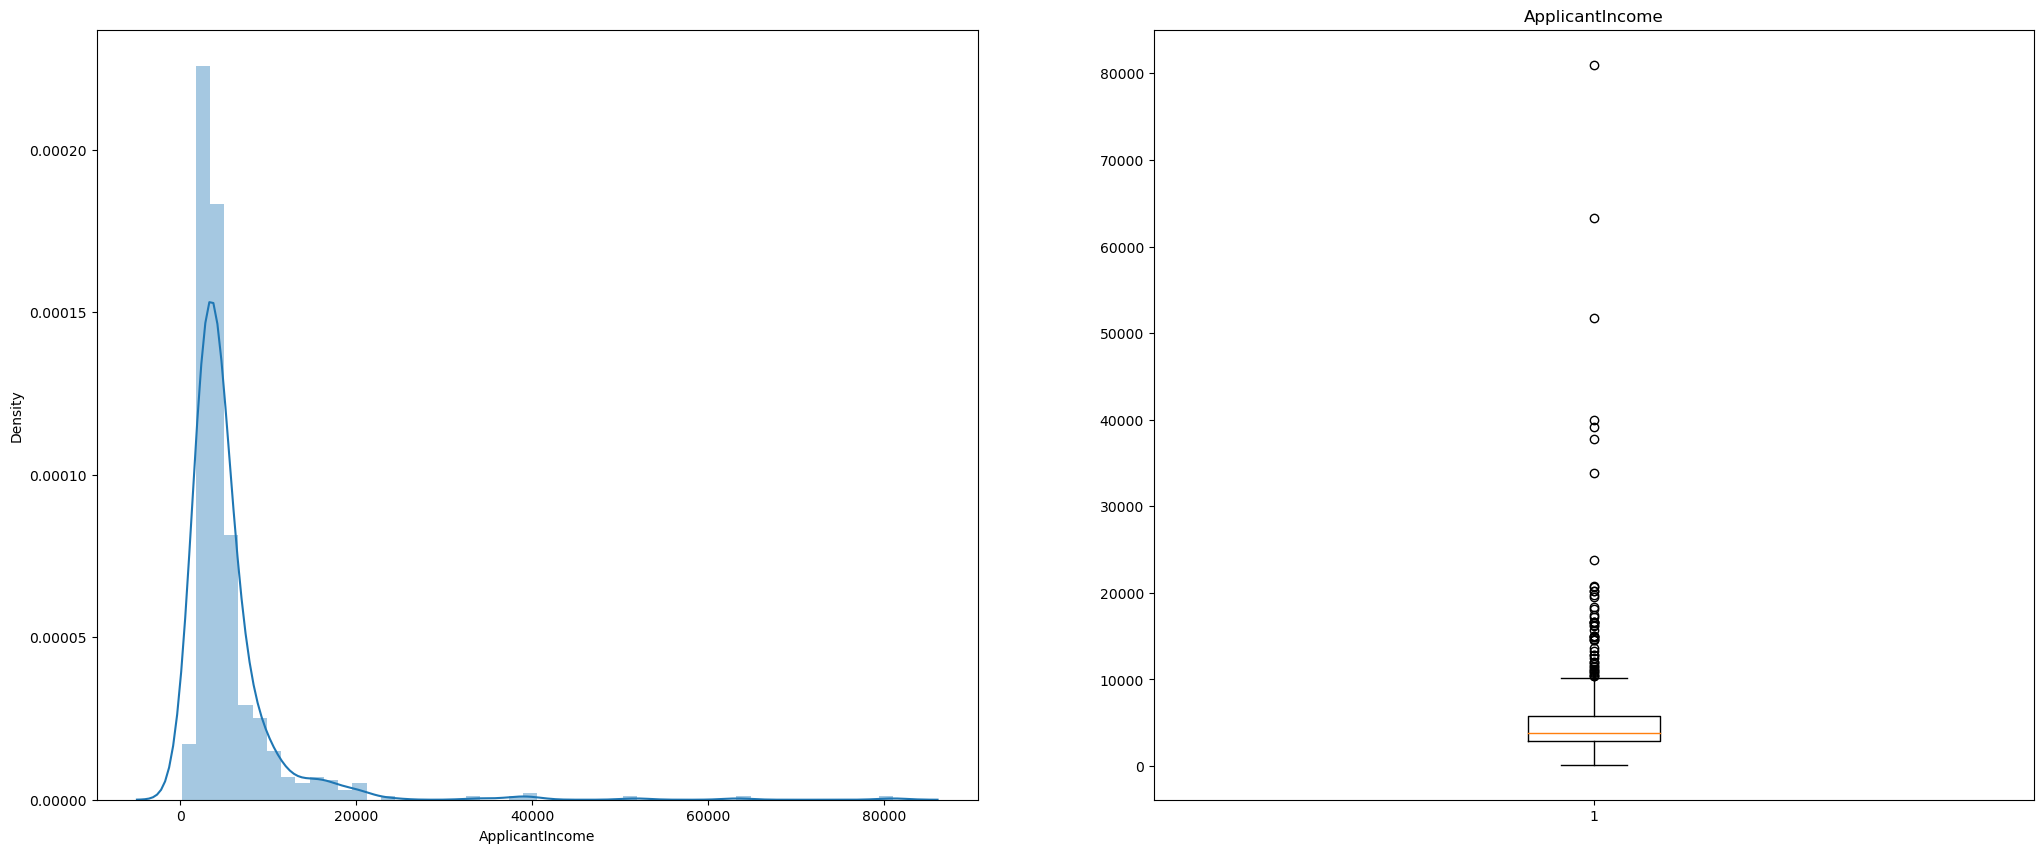

In [21]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.distplot(df_train['ApplicantIncome'])

plt.subplot(1,2,2)
plt.boxplot(df_train['ApplicantIncome'])
plt.title('ApplicantIncome')

plt.show()

- It is inferred that most of the data in the distribuation of variable ApllicantIncome is towards the left which means that the distribuation is not normal.

- The box-plot confirms the presence of a lot of outliers/extream values which means that The Income disparity in the Society. Part of this can be driven by the fact that we are looking at people with different education levels.

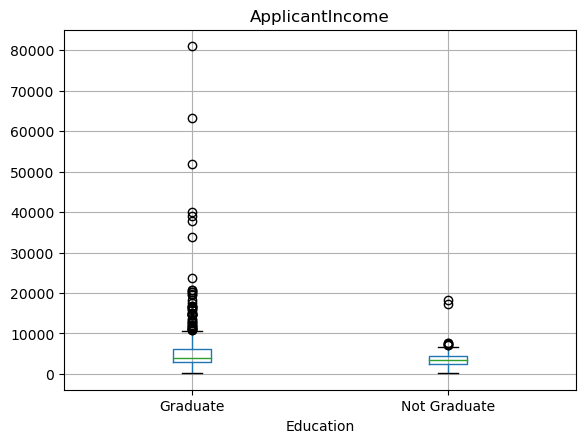

In [22]:
df_train.boxplot(column ='ApplicantIncome', by='Education')
plt.suptitle('')
plt.show()

- from the BoxPlot we can see that there are higher no of Graduate Applicants with higher income which are appearing to be outliers

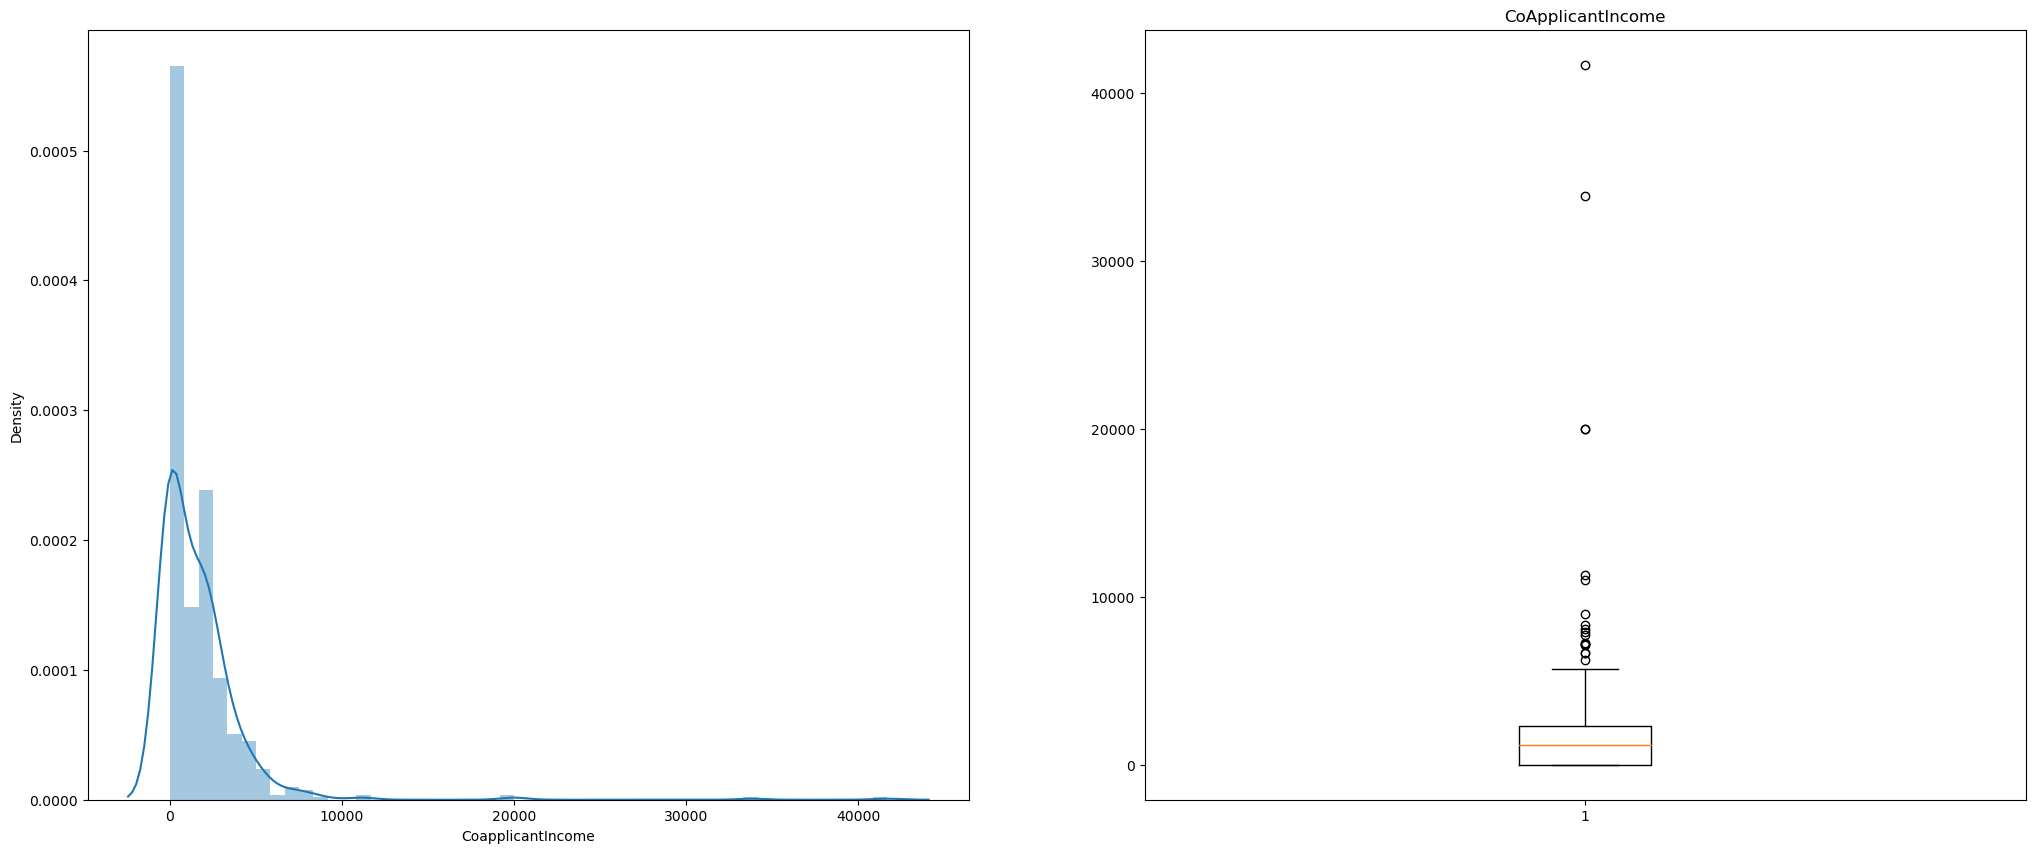

In [23]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.distplot(df_train['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.boxplot(df_train['CoapplicantIncome'])
plt.title('CoApplicantIncome')

plt.show()

- From above plot we can see that a majority of CoApplicants Income are b/w range of 0 to 5000 and it's not normally distributed
- From Box-plot we can see that there are a lot of outliers.

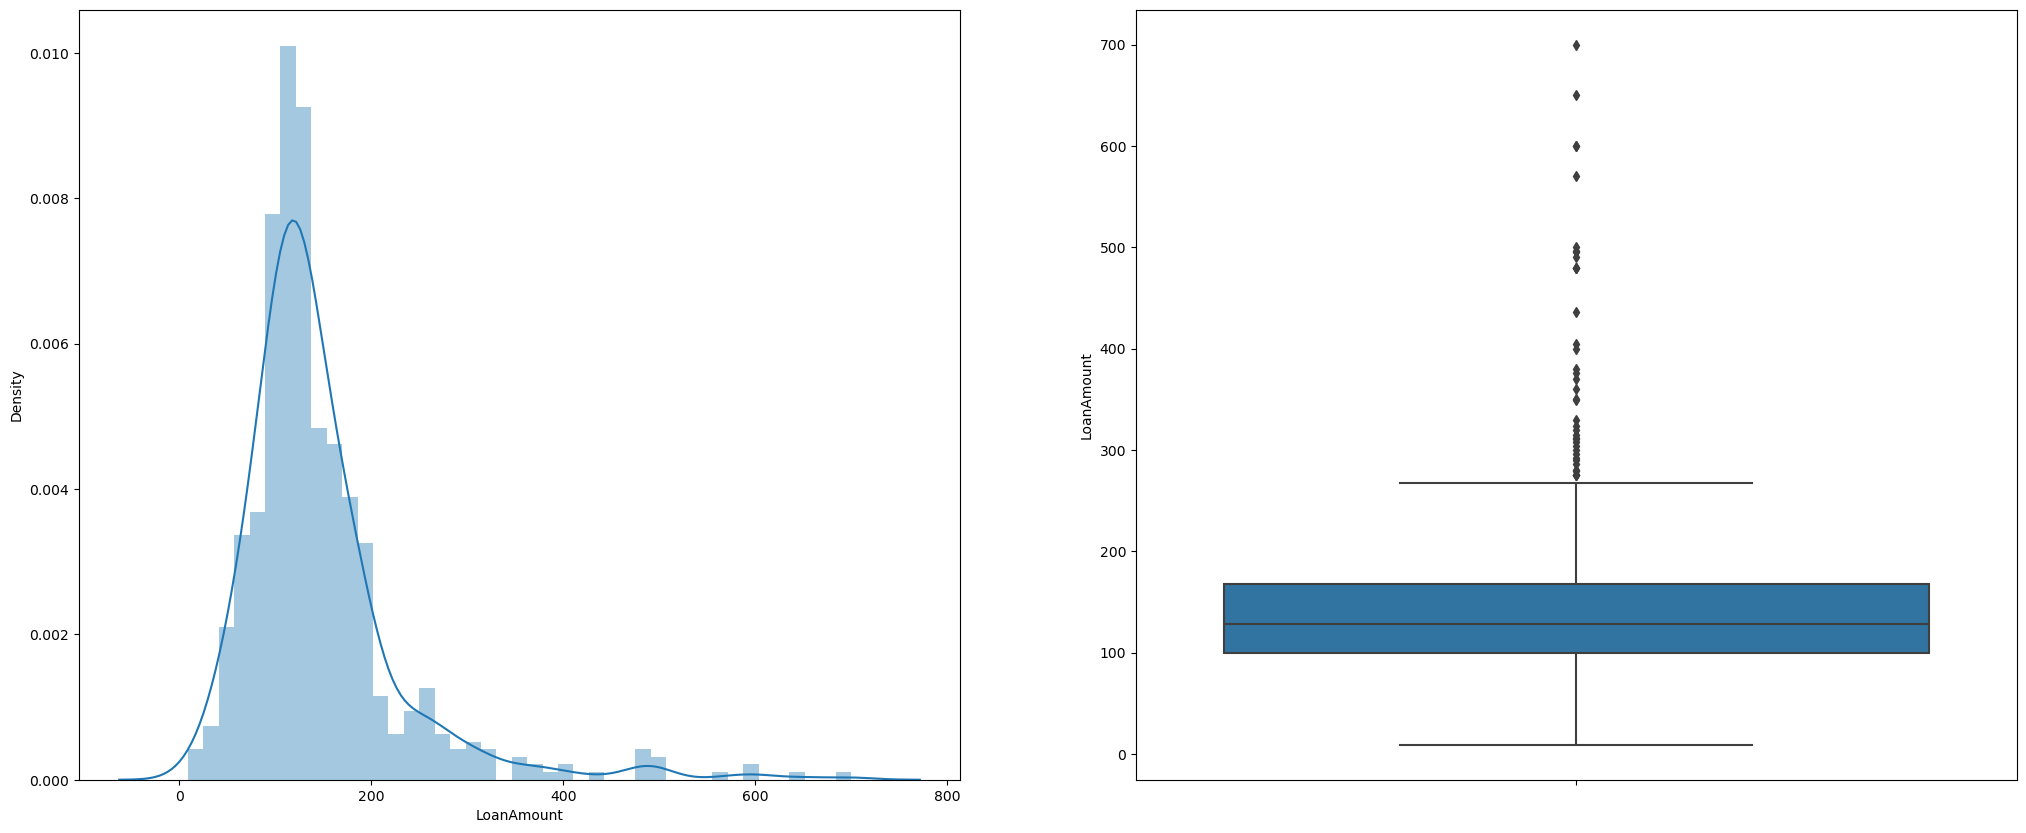

In [24]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.distplot(df_train['LoanAmount'])

plt.subplot(1,2,2)
sns.boxplot(y=df_train['LoanAmount'])

plt.show()

- From above plot we can see that the Distribution is Fairly Normal and there are a lot of outliers present.

**Bivariate Analysis**
* From the hypothesis we had generated earlier:
    i)Applicants with high income should have more chances of loan approval.

    ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

    iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of            loan approval should be high.

    iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

**relation between target variable and categorical independent variables.**

In [25]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
gender = pd.crosstab(df_train['Gender'], df_train['Loan_Status'],normalize=True, margins=True)
gender

Loan_Status,N,Y,All
Gender,,,
Female,0.061564,0.124792,0.186356
Male,0.249584,0.564060,0.813644
All,0.311148,0.688852,1.000000


<AxesSubplot:xlabel='Gender'>

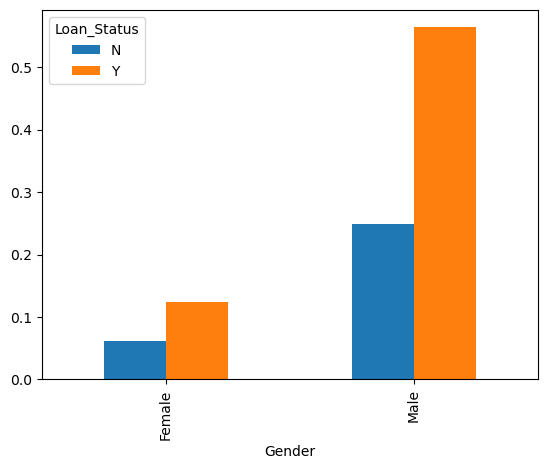

In [27]:
pd.crosstab(df_train['Gender'], df_train['Loan_Status'],normalize=True).plot.bar()

- From above it can be inferred that proportion of Male applicants Loan approvals are more as compared to female

In [28]:
married  = pd.crosstab(df_train['Married'], df_train['Loan_Status'], normalize=True, margins=True)
married

Loan_Status,N,Y,All
Married,,,
No,0.129296,0.219313,0.348609
Yes,0.184943,0.466448,0.651391
All,0.314239,0.685761,1.000000


<AxesSubplot:xlabel='Married'>

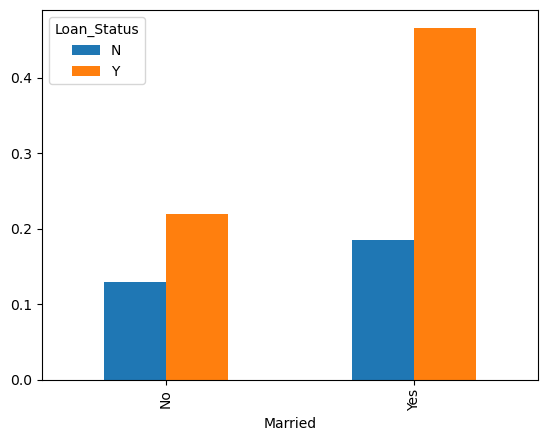

In [29]:
pd.crosstab(df_train['Married'], df_train['Loan_Status'], normalize=True).plot.bar()

- Proportions for married applicants are higher for loan approvals

In [30]:
dependents  = pd.crosstab(df_train['Dependents'], df_train['Loan_Status'], normalize=True)
dependents

Loan_Status,N,Y
Dependents,,
0,0.178631,0.397329
1,0.060100,0.110184
2,0.041736,0.126878
3+,0.030050,0.055092


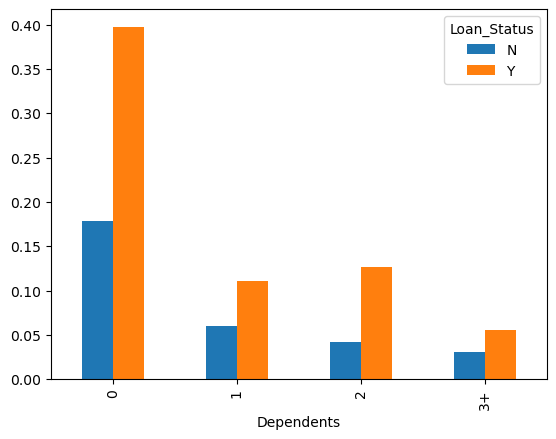

In [31]:
dependents.plot(kind='bar')
plt.show()

- Distribution of Loan approvaed for dependent with 0 to 3+ are similar across both the categories

Loan_Status          N         Y
Education                       
Graduate      0.228013  0.553746
Not Graduate  0.084691  0.133550


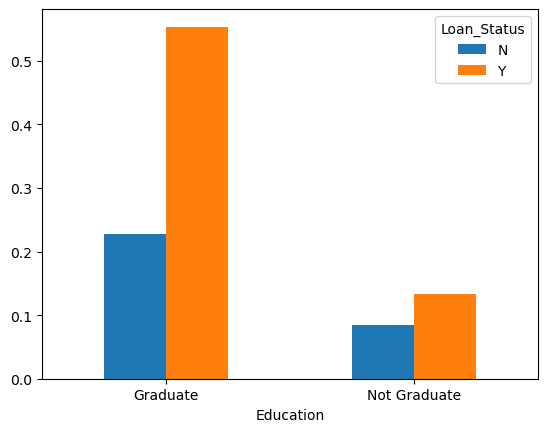

In [32]:
education = pd.crosstab(df_train['Education'], df_train['Loan_Status'], normalize=True)
print(education)
education.plot(kind='bar', rot=0)
plt.show()

- Proportion of loan approved are higher for  Graduate applicants

Loan_Status           N         Y
Self_Employed                    
No             0.269759  0.589347
Yes            0.044674  0.096220


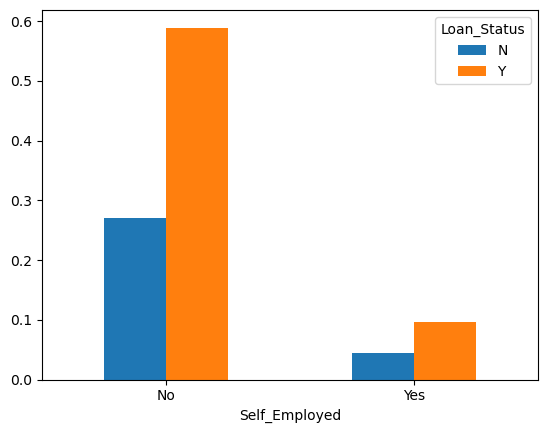

In [33]:
self_employed = pd.crosstab(df_train['Self_Employed'], df_train['Loan_Status'], normalize=True)
print(self_employed)
self_employed.plot(kind='bar', rot=0)
plt.show()

- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

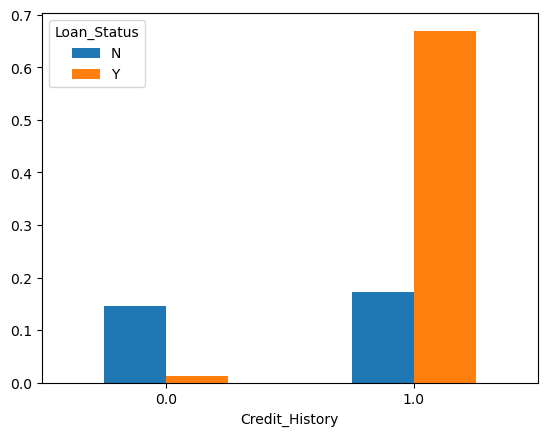

In [34]:
Credit_History = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], normalize=True)
Credit_History.plot(kind='bar', rot=0)
plt.show()

- From above it can be inferred that the applicants with credit_score of 1, are more likely to get loan approved.

Loan_Status           N         Y
Property_Area                    
Rural          0.112378  0.179153
Semiurban      0.087948  0.291531
Urban          0.112378  0.216612


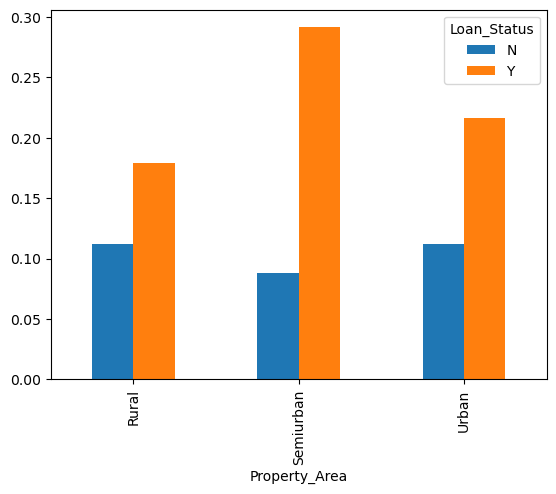

In [35]:
Property_Area  = pd.crosstab(df_train['Property_Area'], df_train['Loan_Status'], normalize=True)
print(Property_Area)
Property_Area.plot(kind='bar')
plt.show()

-  It can be inferred that the proportion of loans getting approved in semiurban area are more as compared to that of rural and urban areas

**Relation b/w Numerical variable and Target variable**

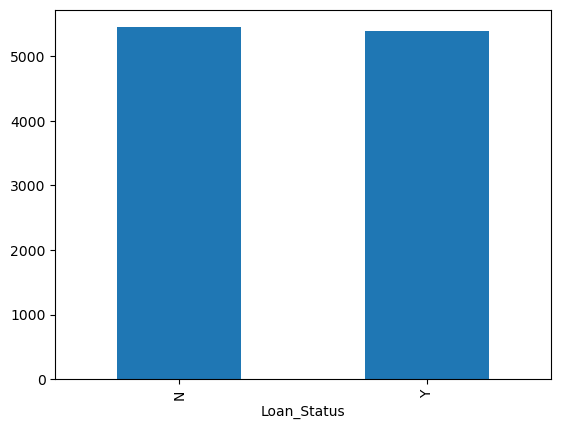

In [36]:
df_train.groupby('Loan_Status').mean()['ApplicantIncome'].plot(kind='bar')
plt.show()

In [37]:
df_train.groupby('Loan_Status').mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

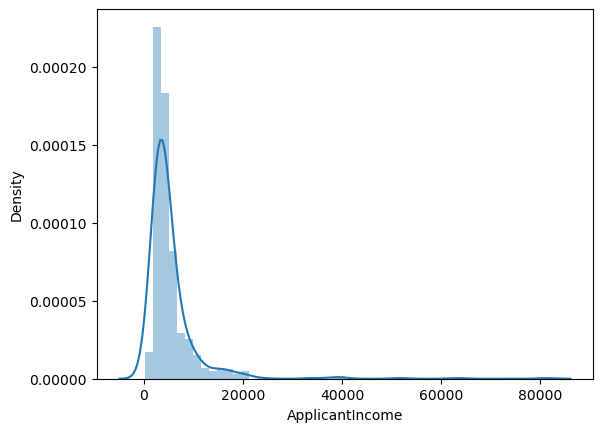

In [38]:
sns.distplot(df_train['ApplicantIncome'], kde=True)
plt.show()

- Here we are not seeing any change in the mean of applicants income So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [39]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
intervals = [0,2500, 4000, 6000, 81000]
categories = ['Low', 'Average', 'High', 'Very High']

In [41]:
df_train['Income_bin'] = pd.cut(df_train['ApplicantIncome'], bins = intervals, labels = categories)

In [42]:
df_train['Income_bin'].head()

0       High
1       High
2    Average
3    Average
4       High
Name: Income_bin, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

In [43]:
df_train['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

Loan_Status         N         Y
Income_bin                     
Low          0.055375  0.120521
Average      0.109121  0.258958
High         0.073290  0.159609
Very High    0.074919  0.148208


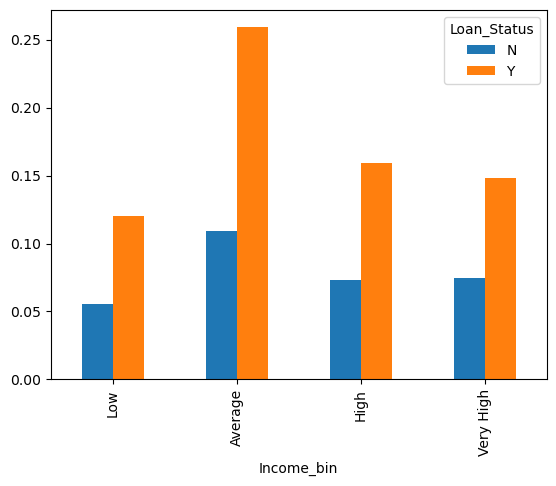

In [44]:
Income_bin = pd.crosstab(df_train["Income_bin"],  df_train["Loan_Status"], normalize=True)
print(Income_bin)
Income_bin.plot.bar()
plt.show()

- From above it can be inferred that Applicants income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicants income is high then the chances of loan approval will also be high

- **now for CoApplicant income**

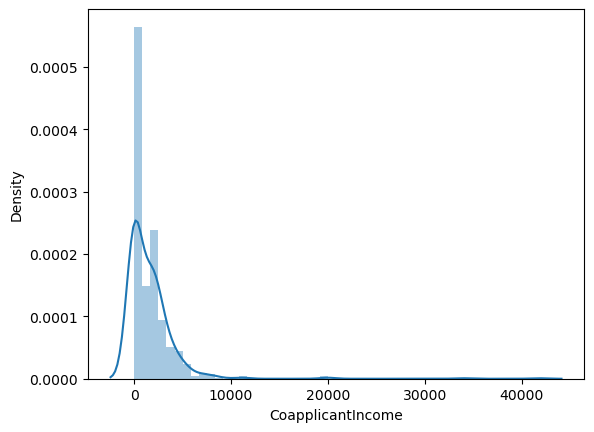

In [45]:
sns.distplot(df_train['CoapplicantIncome'], kde=True)
plt.show()

In [46]:
intervals = [0,1000, 3000, 42000]
categories = ['Low', 'Average', 'High']
df_train['Co_Income_bin'] = pd.cut(df_train['CoapplicantIncome'], bins = intervals, labels = categories)

In [47]:
df_train['Co_Income_bin'].head()

0        NaN
1    Average
2        NaN
3    Average
4        NaN
Name: Co_Income_bin, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

In [48]:
df_train['CoapplicantIncome'].head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

Loan_Status           N         Y
Co_Income_bin                    
Low            0.008798  0.055718
Average        0.178886  0.472141
High           0.093842  0.190616


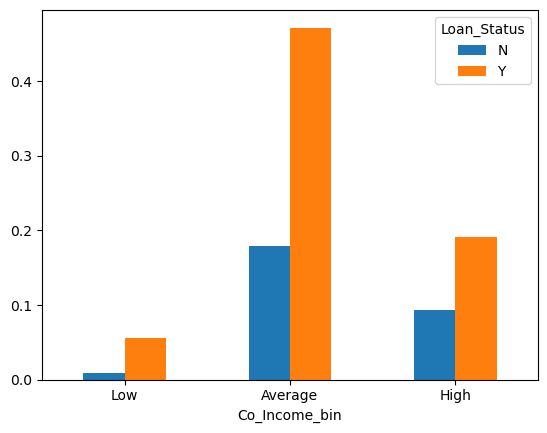

In [49]:
Co_Income_bin = pd.crosstab(df_train['Co_Income_bin'],df_train['Loan_Status'], normalize=True)
print(Co_Income_bin)
Co_Income_bin.plot(kind='bar', rot=0)
plt.show()

- From above it shows that the loans approval chances for Applicants with average income is high which is does not look right.
the possible reason behind this maybe the most of the applicants don't have coapplicants so the copplicants income for such applicants is zero and hence loan approval is not dependent on it. so now we will amke a new variable by combining applicants income and copplicants income and visualize the combine affect on loan approval

In [50]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

In [51]:
intervals = [0,2500, 4000, 6000, 81000]
categories = ['Low', 'Average', 'High', 'Very High']
df_train['Total_Income_bin'] = pd.cut(df_train['Total_Income'], bins = intervals, labels = categories)

Loan_Status              N         Y
Total_Income_bin                    
Low               0.022801  0.016287
Average           0.052117  0.141694
High              0.105863  0.258958
Very High         0.131922  0.270358


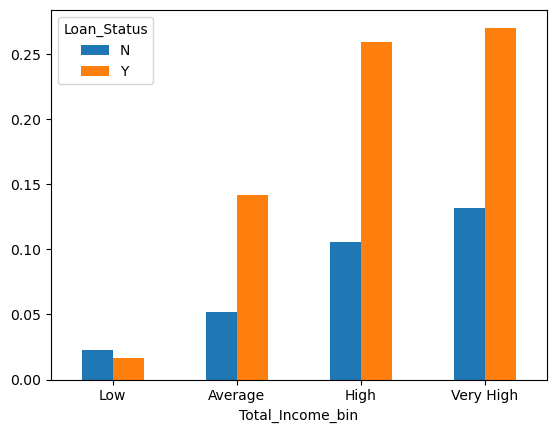

In [52]:
Total_Income_bin = pd.crosstab(df_train['Total_Income_bin'],df_train['Loan_Status'], normalize=True)
print(Total_Income_bin)
Total_Income_bin.plot(kind='bar', rot=0)
plt.show()

- From above plot we can see that proportions of loan getting approved for Applicants with low income is very less caomapred to the Applicants with Average, High and veryHigh Income.

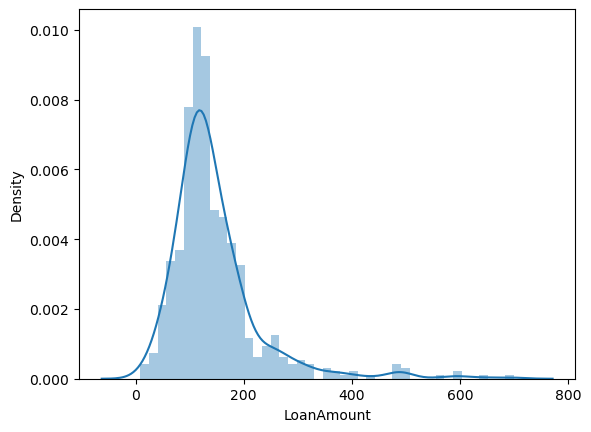

In [53]:
sns.distplot(df_train['LoanAmount'], kde=True)
plt.show()

In [54]:
intervals = [0,100, 200, 700]
categories = ['Low', 'Average', 'High']
df_train['Loan_amount_bin'] = pd.cut(df_train['LoanAmount'], bins = intervals, labels = categories)

In [55]:
df_train['Loan_amount_bin'].head()

0        NaN
1    Average
2        Low
3    Average
4    Average
Name: Loan_amount_bin, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

In [56]:
df_train['LoanAmount'].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

Loan_Status             N         Y
Loan_amount_bin                    
Low              0.079392  0.180743
Average          0.173986  0.430743
High             0.052365  0.082770


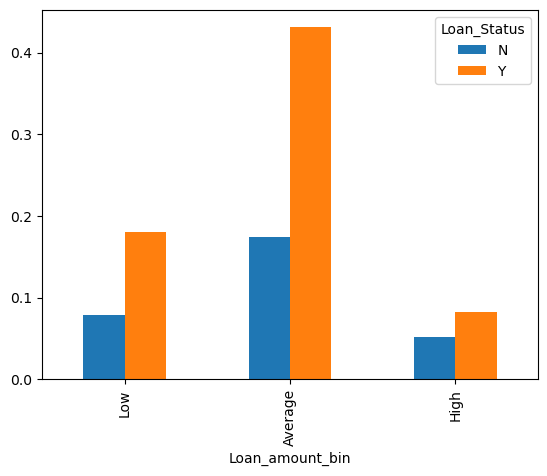

In [57]:
Loan_amount_bin = pd.crosstab(df_train['Loan_amount_bin'], df_train['Loan_Status'], normalize=True)
print(Loan_amount_bin)
Loan_amount_bin.plot(kind='bar')
plt.show()

- It can be inferred that the proportion of approved loan is higher for Low and Averge LoanAmount as compared to High Loanamount which support our hypothesis which we considerd that the chances of loan approval willl be whigh whwn loan amount is less

In [58]:
df_train.shape

(614, 18)

In [59]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_Income,Total_Income_bin,Loan_amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average


In [60]:
df_train.drop(columns =['Income_bin','Co_Income_bin','Total_Income','Total_Income_bin','Loan_amount_bin'], inplace=True)

In [61]:
df_train.shape

(614, 13)

In [62]:
df_train['Dependents'].dtypes

dtype('O')

In [63]:
df_train['Dependents'].replace('3+', 3, inplace=True)
df_test['Dependents'].replace('3+',3, inplace = True)
df_train['Loan_Status'].replace('N', 0, inplace=True)
df_train['Loan_Status'].replace('Y', 1, inplace=True)

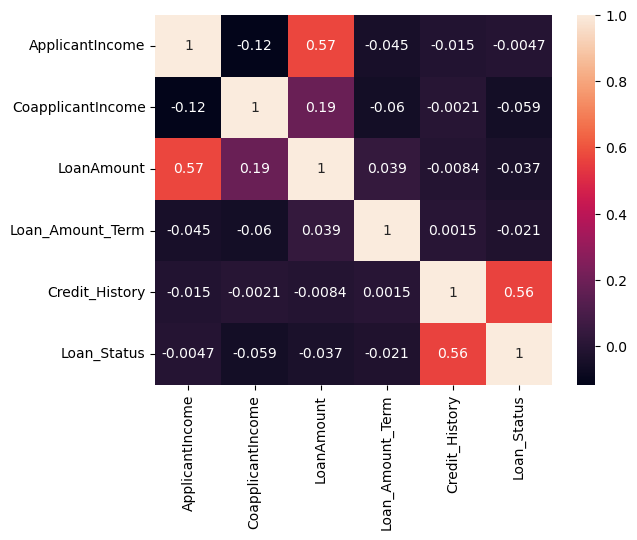

In [64]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

- We can see that most correlated variables are (LoanAmount-CoApplicantIncome) and (Loan_status, Credit_History)

**Missing Values and Outlier Treatment**

In [65]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* **Numerical Variable:** Imputation using Mean or Median
* **Categorical Variable** Imputation using Mode

In [66]:
df_train['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [67]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)

In [68]:
df_train['Married'].mode()

0    Yes
Name: Married, dtype: object

In [69]:
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)

In [70]:
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)

In [71]:
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)

In [72]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [73]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

- It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [74]:
df_train['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [75]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

- As LoanAmount is numerical variable so we can impute using either mean or median since it has otliers, so mean is not a proper way to impute as it highly affected by outliers so we impute using Median

In [76]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace = True)

In [77]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**All missing values treated**

* Now Lets treat the missing values  and Outliers in test_data

In [78]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [79]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace = True)

In [80]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [81]:
df1_train = df_train.copy()
df1_test = df_test.copy()

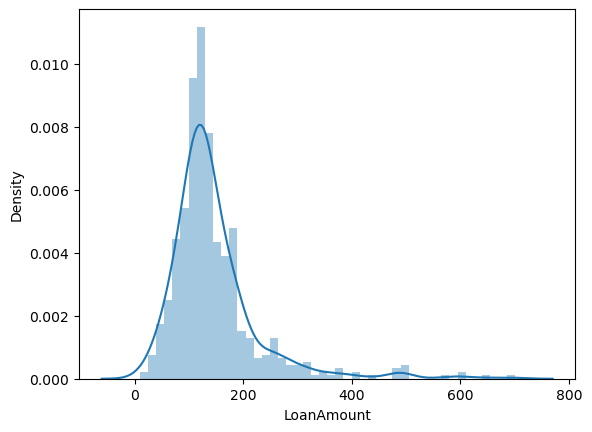

In [82]:
sns.distplot(df_train['LoanAmount'], kde=True)
plt.show()

- Due to these outliers, bulk of the data is in the left and right tail is longer, so the distribuation is right skewd 
- For right skewed data one way  remove skewness is by log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

In [83]:
df_train['LoanAmount'].skew()

2.743052748820892

In [84]:
df_train['LoanAmount'] = np.log(df_train['LoanAmount'] + 0.01)
df_train['LoanAmount'].skew()

-0.19489582828923166

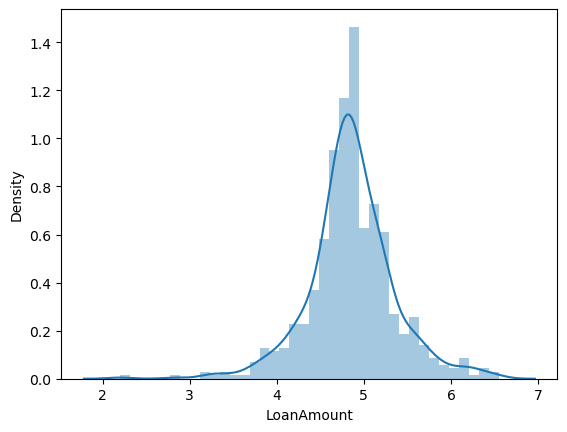

In [85]:
sns.distplot(df_train['LoanAmount'], kde=True)
plt.show()

In [86]:
df_test['LoanAmount'] = np.log(df_test['LoanAmount'] + 0.01)
df_test['LoanAmount'].skew()

-0.2505679366039679

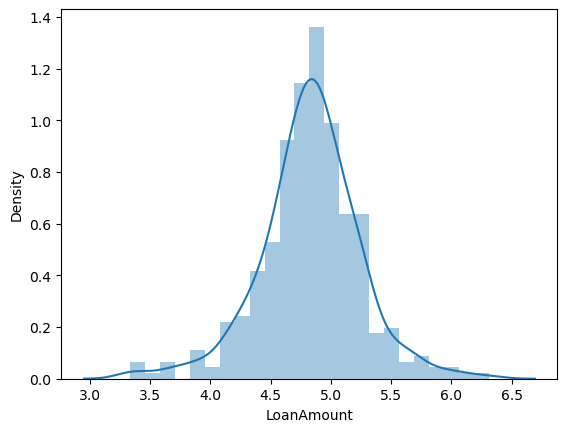

In [87]:
sns.distplot(df_test['LoanAmount'], kde=True)
plt.show()

In [88]:
df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)

In [89]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,4.852108,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852108,360.0,1.0,Rural,0


### Feature Engineering

In [90]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['EMI'] = df_train['LoanAmount'] / df_train['Loan_Amount_Term']
df_train['Balance_Income'] = df_train['Total_Income'] - (df_train['EMI']*1000)

In [91]:
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['EMI'] = df_test['LoanAmount'] / df_test['Loan_Amount_Term']
df_test['Balance_Income'] = df_test['Total_Income'] - (df_test['EMI']*1000)

In [92]:
print(df_train.shape, df_test.shape)

(614, 15) (367, 14)


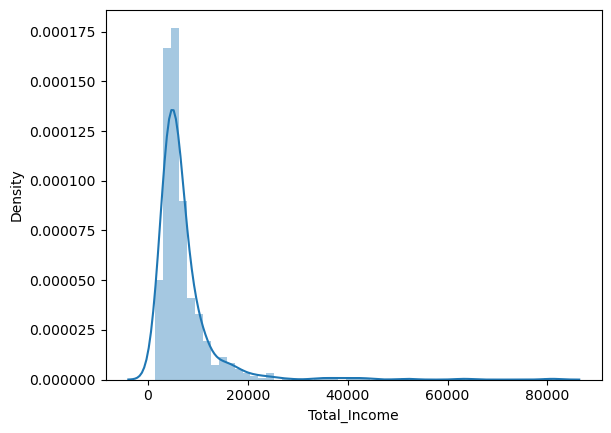

In [93]:
sns.distplot(df_train['Total_Income'])
plt.show()

In [94]:
df_train['Total_Income'] = np.log(df_train['Total_Income'] + 0.01)
df_train['Total_Income'].skew()

1.076705804239154

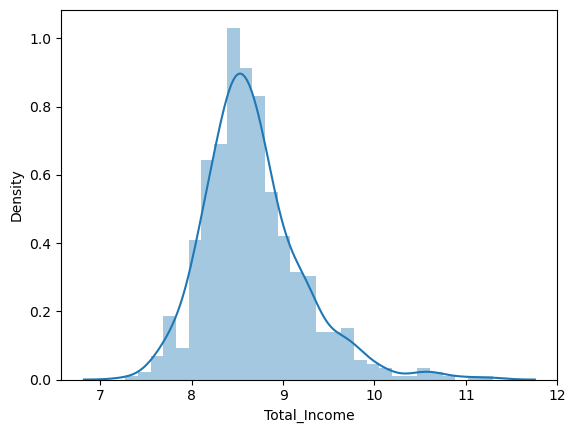

In [95]:
sns.distplot(df_train['Total_Income'])
plt.show()

In [96]:
df_test['Total_Income'] = np.log(df_test['Total_Income'] + 0.01)
df_test['Total_Income'].skew()

1.1719826414347745

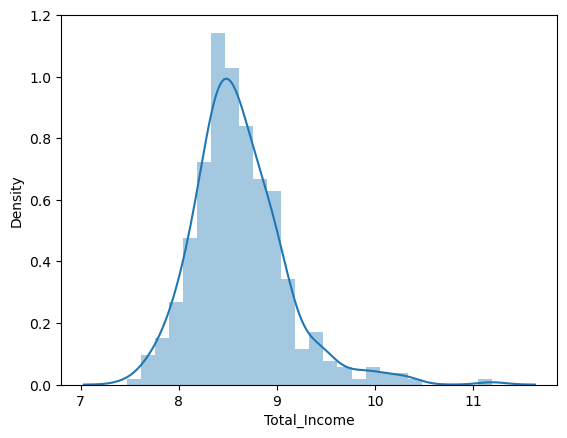

In [97]:
sns.distplot(df_test['Total_Income'])
plt.show()

In [98]:
df_train.drop(columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], inplace=True)
df_test.drop(columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], inplace=True)

In [99]:
print(df_train.shape, df_test.shape)

(614, 11) (367, 10)


**X & y**

In [100]:
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

In [101]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Credit_History,Total_Income,EMI,Balance_Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.674028,0.013478,5835.521921,1,0,1,0,0,0,0,0,1
1,1.0,8.714569,0.013478,6077.521921,1,1,0,1,0,0,0,0,0
2,1.0,8.006371,0.011638,2988.361649,1,1,1,0,0,0,1,0,1
3,1.0,8.505325,0.013299,4927.701180,1,1,1,0,0,1,0,0,1
4,1.0,8.699516,0.013747,5986.253248,1,0,1,0,0,0,0,0,1


### Modelling and Evaluation

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-2.51562283, -1.76825501, -0.24976801, ..., -0.41453312,
        -0.75411544,  1.38033526],
       [ 0.39751587, -1.33055003, -0.34789687, ..., -0.41453312,
         1.32605692, -0.72446168],
       [-2.51562283, -0.20985488, -0.17120671, ..., -0.41453312,
        -0.75411544,  1.38033526],
       ...,
       [ 0.39751587, -0.32362804, -0.14493655, ..., -0.41453312,
        -0.75411544, -0.72446168],
       [ 0.39751587, -0.0257065 , -0.15076729, ..., -0.41453312,
        -0.75411544, -0.72446168],
       [ 0.39751587,  0.52281911, -0.14724037, ..., -0.41453312,
         1.32605692, -0.72446168]])

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [112]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'logistic_regression':{'model':LogisticRegression(), 'parameters':{'penalty' : ['l1', 'l2', 'elasticnet', 'none']}},
             
             'decision_tree':{'model':DecisionTreeClassifier(random_state=0), 'parameters':{'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}},
             
             'random_forest':{'model':RandomForestClassifier(random_state=0), 'parameters':{'n_estimators':[5,10,15,20,50,60,100]}},
             
              'xg_boost':{'model':XGBClassifier(), 'parameters':{'n_estimators':[10,20,40], 'max_depth':[3,4,5],'gamma':[0,0.3,0.5,1]}},
             
              'ada_boost':{'model':AdaBoostClassifier(), 'parameters':{'n_estimators':[10,20,40,50]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,logistic_regression,{'penalty': 'l2'},0.802945
1,decision_tree,"{'criterion': 'gini', 'max_depth': 1}",0.809463
2,random_forest,{'n_estimators': 50},0.778569
3,xg_boost,"{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}",0.799720
4,ada_boost,{'n_estimators': 10},0.801306


- **Since LogisticRegression giving highest accuracy, we will select LogisticRegression for our dataset.**

In [113]:
# Using cross_val_score for getting highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X,y, cv=5)
print('Cross validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross validation Score:80%


In [116]:
#Creatin LogisticRegression model
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8292682926829268

In [117]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8024439918533605
Test Accuracy: 0.8292682926829268


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[20, 19],
       [ 2, 82]], dtype=int64)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.91      0.51      0.66        39
           1       0.81      0.98      0.89        84

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



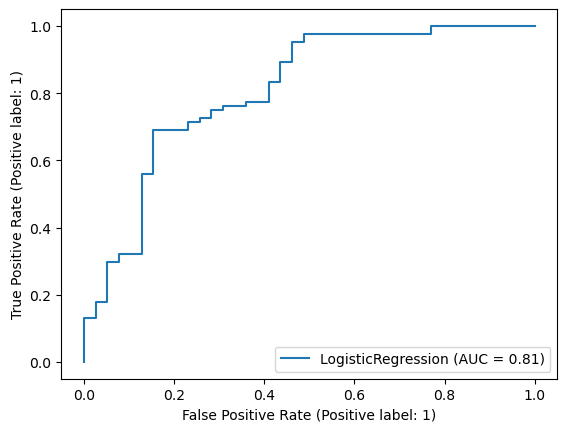

In [121]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,y_test)
plt.show()

- our predictions are almost 83% accurate, i.e. we have identified 83% of the loan status correctly using LogisticRegression Model.

In [122]:
test = pd.get_dummies(df_test, drop_first=True)

In [123]:
print(X.shape, test.shape)

(614, 13) (367, 13)


**Predicting the test_set with LogisticRegression Model**

In [125]:
test_pred = model.predict(test)
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [126]:
submission = pd.read_csv('loanPred_data\\Submission.csv')

In [127]:
submission['Loan_Status'].replace({'N':0, 'Y':1}).head()

0    0
1    0
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [128]:
submission['Loan_Status'] = test_pred

In [129]:
submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [130]:
submission.to_csv('loan_submission.csv',index=False)